### Calibrating our Power Law Estimator method

Let $p(x)=x^{-\alpha}$, where $\alpha=1+\mu$

We want to estimate the exponent $\alpha$ for our eigenvalue Empirical Spectral Density (ESD).

The currently acceptable way to measure a power law exponent $\alpha$ is the Clauset-Shalizi-Newman Maximum Likelihood Estimator $ML_{CSN}$, implemented in the powerlaw python package

https://github.com/jeffalstott/powerlaw

But the $ML_{CSN}$ estimator is thought to only work well in the range $\alpha\in[1.5, 3.5]$, but is unreliable for other values of $\alpha$

Here, we examine how well the $ML_{CSN}$ estimator method works on test data

We generate sample data using the numpy pareto method

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.pareto.html

and test how well the basic powerlaw method fit works, for data set sizes $N\sim1000$, the maximum number of eigenvalues we would see in a DNN

### Results

We find that for our size N, the $ML_{CSN}$ estimator seems to systematically 

- overestimates for $\alpha<2.5$ 
- understimates for $\alpha>2.5$

and is only really reliable for $\alpha\in[2,3]$

In the paper, we only report $\alpha$ as fit using the $ML_{CSN}$ estimator in the powerlaw package. In principle, we could get a better estimate of $alpha$ by creating a calibration curve, for each specific $N$, and report the corrected value, with error bars.  


### Results for Larger N ~ 5000

See the CalibrateLargeNPL.ipynb  notebook

At this size, the estimator does work well for $alpha\in[1.5,3.5]$ 

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import powerlaw

In [2]:
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})

### Test $N=1000$ data set size, 10 runs each. 

We set xmax explicitly, but we find that not setting xmax does not change the basic result here

In [3]:
NUM = 1000
NTEST = 10
test_mus = []
fit_alphas = []
mus = [0.1, 0.5, 1, 1.5, 2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
for mu in mus:
    for n in range(NTEST):
        data = np.random.pareto(a=mu, size=NUM)

        fit = powerlaw.Fit(data, xmax=np.max(data))
        alpha, D = fit.alpha, fit.D

        test_mus.append(mu)
        fit_alphas.append(alpha)

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calc

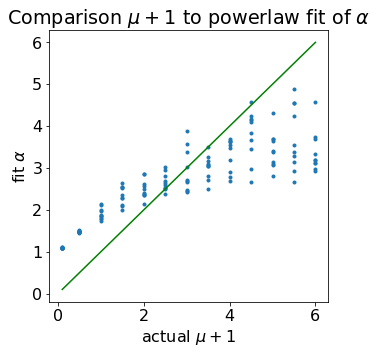

In [4]:
plt.scatter(test_mus, fit_alphas, marker='.')
plt.plot(test_mus,test_mus, color='g')
plt.title(r'Comparison $\mu+1$ to powerlaw fit of $\alpha$')
plt.xlabel(r'actual $\mu+1$')
plt.ylabel(r'fit $\alpha$')
plt.savefig('img/powerlaw-calibration')

### Demonstration of Plots

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


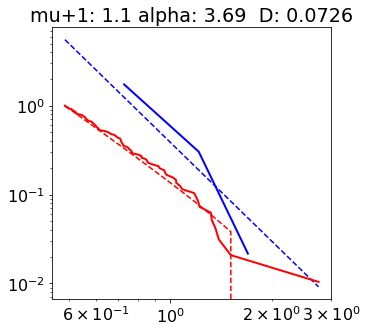

Calculating best minimal value for power law fit


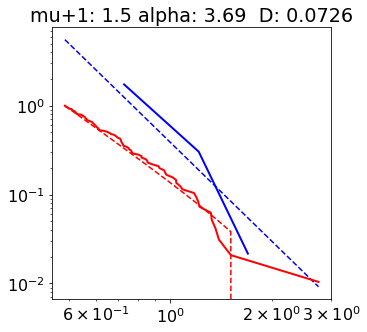

Calculating best minimal value for power law fit


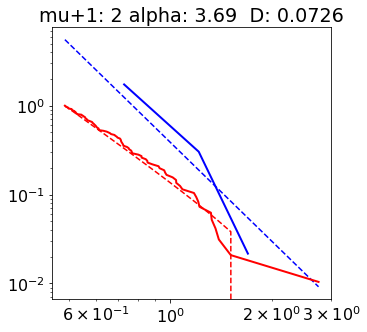

Calculating best minimal value for power law fit


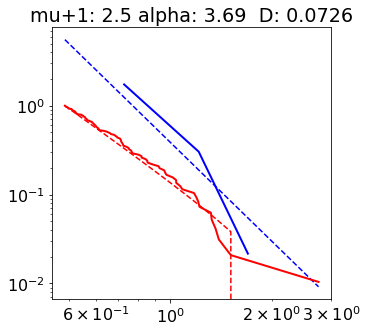

Calculating best minimal value for power law fit


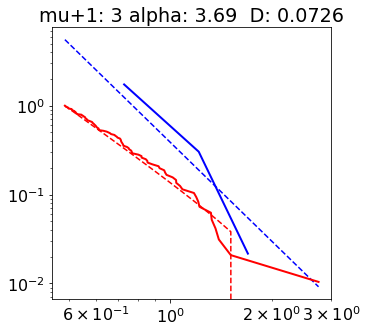

Calculating best minimal value for power law fit


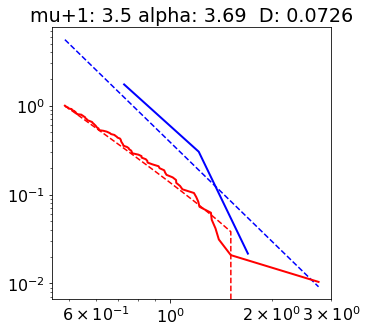

Calculating best minimal value for power law fit


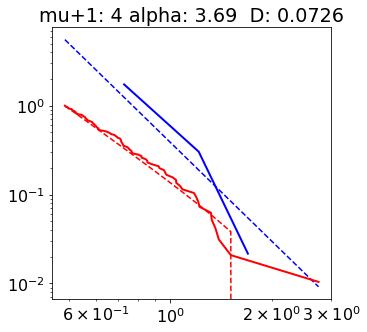

Calculating best minimal value for power law fit


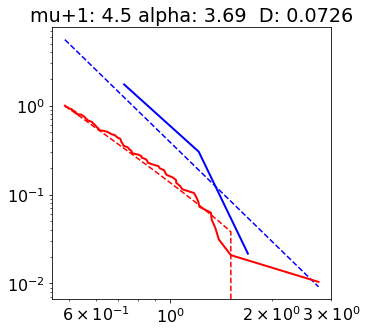

Calculating best minimal value for power law fit


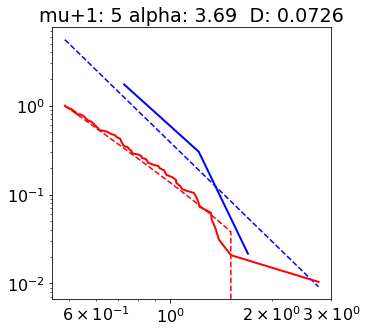

Calculating best minimal value for power law fit


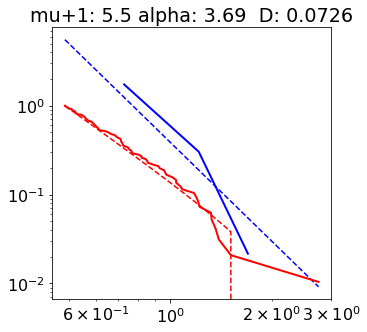

Calculating best minimal value for power law fit


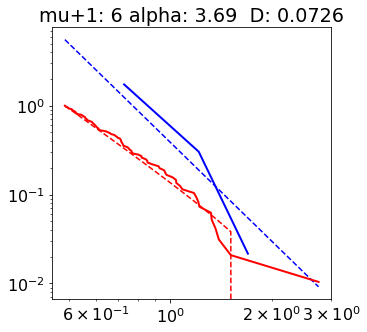

Calculating best minimal value for power law fit


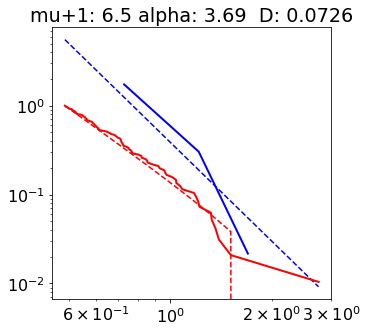

Calculating best minimal value for power law fit


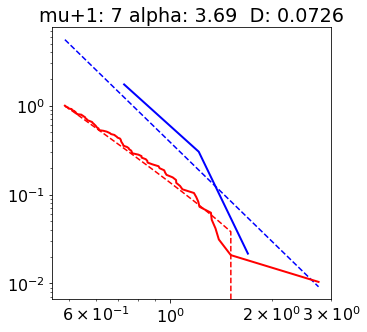

In [5]:
for mu in mus:   
    fit = powerlaw.Fit(data, xmax=np.max(data))
    alpha, D = fit.alpha, fit.D
    fit_alphas.append(alpha)

    fig2 = fit.plot_pdf(color='b', linewidth=2)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
    fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
    plt.title('mu+1: {:.3g} alpha: {:.3g}  D: {:.3g}'.format(mu+1,alpha,D))
    plt.show()